**un exemple comment choisir un modele :**

In [ ]:
#installer la bibliothèque reliability s'il necessaire
!pip install reliability

In [2]:
#pandas pour le tableau
import pandas as pd
#numply pour les nombres
import numpy as np
#pour les graphes
import matplotlib.pyplot as plt
#plus des outils pour les graphes
import seaborn as sns
#pour les warnings (pes des erreurs)
import warnings
warnings.filterwarnings('ignore')
#importer la pachage (bibliotheque que nous avons installer)
import reliability
from reliability.Fitters import Fit_Everything
#pour le loi normal (le modele est deja implimete en python)
from scipy.stats import norm
from scipy import stats

In [3]:
#importer notre fichier csv
#verifier l'emplacement de fichier!!
failure_times = pd.read_csv('/content/drive/MyDrive/datasets/failure_times.csv')

In [4]:
#un échantillon de notre donnees
failure_times.head()

,machine 1,machine 2
0,18.4836,20.9739
1,20.7082,23.192
2,18.2068,17.6222
3,21.8016,15.9528
4,23.9715,17.5691


In [5]:
#une description statistique des donnees de machine 2
#moyenne : 20.1857
#ecart type : 2.82453
failure_times['machine 2'].describe()

count       100
mean    20.1857
std     2.82453
min     12.9348
25%     18.4794
50%     20.2791
75%     21.9617
max     26.1262
Name: machine 2, dtype: float64

In [6]:
#nombres d'occurences des valeurs ex: 20 --> 19 fois
failure_times['machine 2'].round(0).value_counts(ascending=True)

13     1
25     2
17     3
15     4
26     4
22     5
16     7
23     8
24     9
18    11
19    12
21    15
20    19
Name: machine 2, dtype: int64

Text(0, 0.5, 'Frequency')

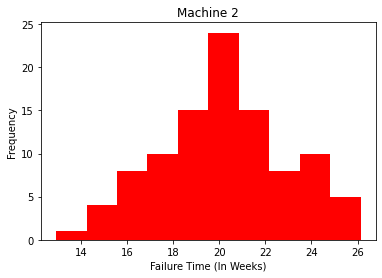

In [7]:
#un histogramme qui affiche graphiquement ces nombres d'occurences
plt.hist(failure_times['machine 2'],color = 'red')
#titre
plt.title("Machine 2")
#x
plt.xlabel("Failure Time (In Weeks)")
#y
plt.ylabel("Frequency")

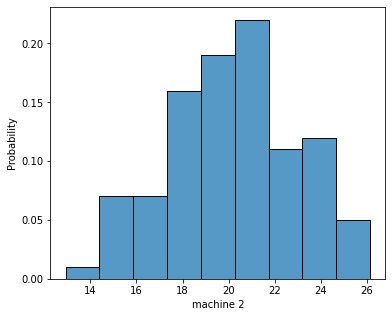

In [8]:
#on va utiliser seaborn pour trasformer notre histogramme (reduire) a un nouveau histogramme de probabilité
#afficher la figure
fig, ax = plt.subplots(figsize=(6, 5))
#reduire le histogramme 
p = sns.histplot(data=failure_times, x='machine 2', stat='probability', ax=ax)

en remarque que par exemple que notre distribution suit un loi normale

**la formule de loi normal**

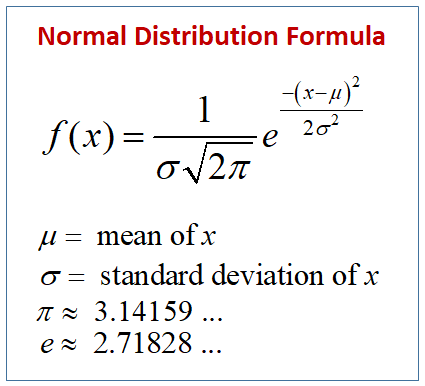

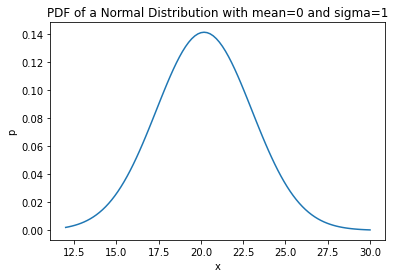

In [9]:
#generer une list des points entre 12 et 30 par exemple
x = np.linspace(12,30,100)
#calculer les valeurs en loi normal de ces points
pdf_result = stats.norm.pdf(x,loc=20.1857,scale=2.82453)
#dessiner le graphe
plt.plot(x,pdf_result)
#x
plt.xlabel('x')
#y
plt.ylabel('p')
#titre
plt.title("PDF of a Normal Distribution with mean=0 and sigma=1")
#aficher le graphe
plt.show()

In [10]:
#exemple de calcul pour un valeur t = 25
stats.norm.pdf(25,loc=20.1857,scale=2.82453)

0.03304538295258827